In [ ]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)

Mounted at /content/gdrive


Install Kaggle API.

In [ ]:
!pip install kaggle

Change the current working directory to where you want to download the Kaggle dataset.

In [ ]:
%cd /content/gdrive/MyDrive/ML Projects/Customer Segmentation/

/content/gdrive/MyDrive/ML Projects/Customer Segmentation


Run the following code to configure the path to “kaggle.json”.


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/gdrive/MyDrive/ML Projects/Customer Segmentation/"

(7) Download the dataset.

In [ ]:
# !kaggle competitions download -c house-prices-advanced-regression-techniques

!kaggle datasets download -d kunalgupta2616/hackerearth-customer-segmentation-hackathon

hackerearth-customer-segmentation-hackathon.zip: Skipping, found more recently modified local copy (use --force to force download)


In [ ]:
!unzip -q hackerearth-customer-segmentation-hackathon.zip
!ls

In [ ]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns


%matplotlib inline


import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Chardet: The Universal Character Encoding Detector (ASCII, UTF-8, UTF-16, UTF-32,Big5, GB2312, EUC-TW, HZ-GB-2312 etc)
import chardet

In [ ]:
# Checking the encoding of day file
with open("avhacklive/Train.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
# Checking the encoding of day file
with open("avhacklive/Test.csv", 'rb') as rawdata:
    result = chardet.detect(rawdata.read())

# check what the character encoding might be
print(result)

{'encoding': 'ascii', 'confidence': 1.0, 'language': ''}


In [ ]:
train_df = pd.read_csv("avhacklive/Train.csv", encoding='palmos')
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                31647 non-null  object 
 1   customer_age                      31028 non-null  float64
 2   job_type                          31647 non-null  object 
 3   marital                           31497 non-null  object 
 4   education                         31647 non-null  object 
 5   default                           31647 non-null  object 
 6   balance                           31248 non-null  float64
 7   housing_loan                      31647 non-null  object 
 8   personal_loan                     31498 non-null  object 
 9   communication_type                31647 non-null  object 
 10  day_of_month                      31647 non-null  int64  
 11  month                             31647 non-null  object 
 12  last

In [ ]:
test_df = pd.read_csv("avhacklive/Test.csv", encoding='palmos')
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13564 entries, 0 to 13563
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   id                                13564 non-null  object 
 1   customer_age                      13294 non-null  float64
 2   job_type                          13564 non-null  object 
 3   marital                           13483 non-null  object 
 4   education                         13564 non-null  object 
 5   default                           13564 non-null  object 
 6   balance                           13383 non-null  float64
 7   housing_loan                      13564 non-null  object 
 8   personal_loan                     13490 non-null  object 
 9   communication_type                13564 non-null  object 
 10  day_of_month                      13564 non-null  int64  
 11  month                             13564 non-null  object 
 12  last

In [ ]:
# Way to display & see the column names
train_df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome,term_deposit_subscribed
0,id_43823,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,NaN,0,unknown,0
1,id_32289,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,132.0,1,other,0
2,id_10523,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,NaN,0,unknown,0
3,id_43951,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,NaN,0,unknown,0
4,id_40992,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,NaN,0,unknown,0


In [ ]:
# Way to display & see the column names
test_df.head()

,id,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,days_since_prev_campaign_contact,num_contacts_prev_campaign,prev_campaign_outcome
0,id_17231,55.0,retired,married,tertiary,no,7136.0,no,no,cellular,13,aug,90.0,2.0,NaN,0,unknown
1,id_34508,24.0,blue-collar,single,secondary,no,179.0,yes,no,cellular,18,may,63.0,2.0,NaN,0,unknown
2,id_44504,46.0,technician,divorced,secondary,no,143.0,no,no,cellular,8,jul,208.0,1.0,NaN,0,unknown
3,id_174,56.0,housemaid,single,unknown,no,6023.0,no,no,unknown,6,jun,34.0,1.0,NaN,0,unknown
4,id_2115,62.0,retired,married,secondary,no,2913.0,no,no,cellular,12,apr,127.0,1.0,188.0,1,success


Train data is having 18 features and test data is having 17 features. So, dropping the feature "term_deposit_subscribed" from train_df as it is not present in test_df

In [ ]:
train_df.drop('term_deposit_subscribed',inplace=True,axis=1)

In [ ]:
# To count the number of dtypes in the given object.
train_df.dtypes.value_counts()

object     10
float64     5
int64       2
dtype: int64

Has more categorical values, so I opt to model with other than logistic regression.

### Checking Duplicates

Checking for Duplicates

In [ ]:
#Check duplicates in train dataset
duplicate = train_df[train_df.duplicated(keep='first')]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate.shape

Duplicate Rows :


(0, 17)

In [ ]:
#Check duplicates in test dataset
duplicate = test_df[test_df.duplicated(keep='first')]
  
print("Duplicate Rows :")
  
# Print the resultant Dataframe
duplicate.shape

Duplicate Rows :


(0, 17)

In [ ]:
train_df.shape

(31647, 17)

In [ ]:
test_df.shape

(13564, 17)

In [ ]:
#Creating a function to plot Count plot
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

In [ ]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12,4))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

Common function to print missing values

In [ ]:
def get_MissingValues(df):
    cols = []
    column_with_nan = df.columns[df.isnull().any()]
    for column in column_with_nan:
        percent_missing = round(df[column].isnull().mean()*100,2)        
        cols.append({'colname':column,'percentage':percent_missing,'featureDtype':str(df[column].dtype)})  
    
    if len(cols) > 0:     
        # Creates DataFrame. 
        print(f'{len(cols)} features have missing value')
        missingDF = pd.DataFrame(cols).sort_values(by=['percentage'], ascending=False)
    else:
        missingDF = "No missingValues"
        
    return missingDF

### Handling Missing Values

In [ ]:
train_missing_df = get_MissingValues(train_df)
train_missing_df.head(train_missing_df.shape[0])

7 features have missing value


,colname,percentage,featureDtype
6,days_since_prev_campaign_contact,81.62,float64
0,customer_age,1.96,float64
2,balance,1.26,float64
4,last_contact_duration,0.98,float64
1,marital,0.47,object
3,personal_loan,0.47,object
5,num_contacts_in_campaign,0.35,float64


In [ ]:
test_missing_df = get_MissingValues(test_df)
test_missing_df.head(test_missing_df.shape[0])

7 features have missing value


,colname,percentage,featureDtype
6,days_since_prev_campaign_contact,82.00,float64
0,customer_age,1.99,float64
2,balance,1.33,float64
4,last_contact_duration,0.90,float64
1,marital,0.60,object
3,personal_loan,0.55,object
5,num_contacts_in_campaign,0.33,float64


**days_since_prev_campaign_contact** is having more than 80% of missing data. So drop the feature from both train and test

In [ ]:
train_df.drop('days_since_prev_campaign_contact',axis=1,inplace=True)
test_df.drop('days_since_prev_campaign_contact',axis=1,inplace=True)

**id** is not applicable for this analysis. So dropping the feature

In [ ]:
train_df.drop('id',axis=1,inplace=True)
test_df.drop('id',axis=1,inplace=True)

In [ ]:
train_df.shape

(31647, 15)

In [ ]:
test_df.shape

(13564, 15)

With refernce to this dataset defenition, the missing values are filled as per the feature data.
https://docs.1010data.com/Tutorials/MachineLearningExamples/BankMarketingDataSet_2.html

In [ ]:
train_df["marital"].value_counts()

married     18945
single       8857
divorced     3695
Name: marital, dtype: int64

In [ ]:
train_df["marital"] = train_df["marital"].fillna("unknown")
test_df["marital"] = test_df["marital"].fillna("unknown")

In [ ]:
print("Train")
print(train_df['marital'].value_counts())
print()
print("Test")
print(test_df['marital'].value_counts())

Train
married     18945
single       8857
divorced     3695
unknown       150
Name: marital, dtype: int64

Test
married     8123
single      3869
divorced    1491
unknown       81
Name: marital, dtype: int64


In [ ]:
train_df["personal_loan"]=train_df["personal_loan"].fillna("unknown")
test_df["personal_loan"]=test_df["personal_loan"].fillna("unknown")

In [ ]:
print("Train")
print(train_df['personal_loan'].value_counts())
print()
print("Test")
print(test_df['personal_loan'].value_counts())

Train
no         26463
yes         5035
unknown      149
Name: personal_loan, dtype: int64

Test
no         11314
yes         2176
unknown       74
Name: personal_loan, dtype: int64


Visualizing for train and test data - to check for outliers

In [ ]:
cont_feat = ['customer_age', 'balance', 'last_contact_duration', 'num_contacts_in_campaign']

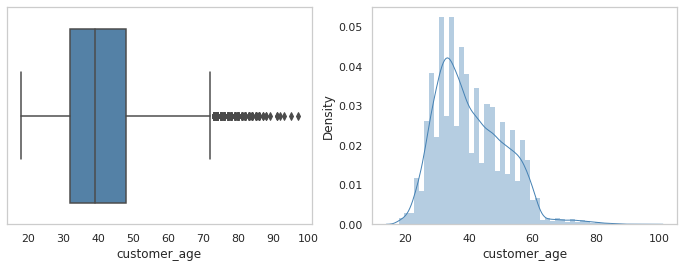

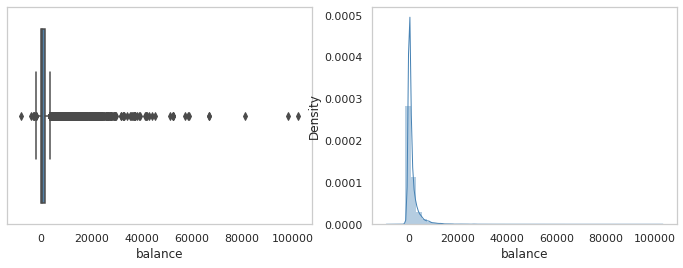

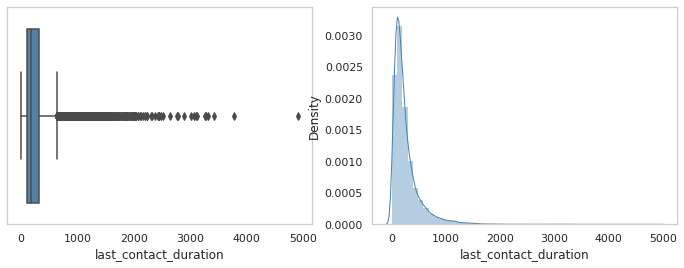

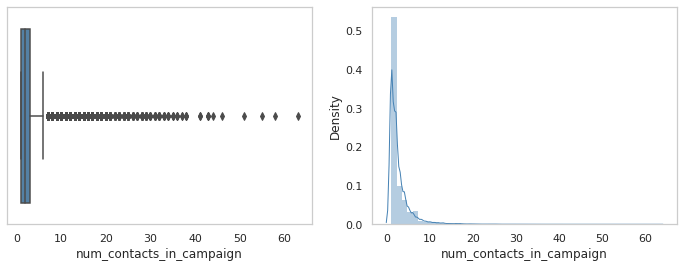

In [ ]:
fig_num = 1        
for col in train_df.select_dtypes(include=[np.number]).columns:
    if col in cont_feat:
        hist_box_plot(train_df,col, fig_num)
        fig_num = fig_num + 1

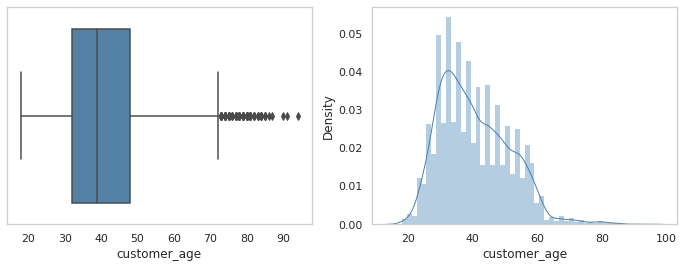

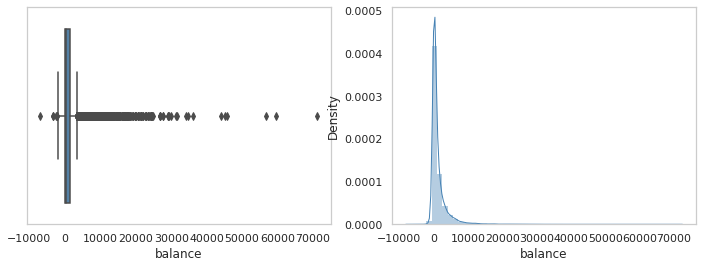

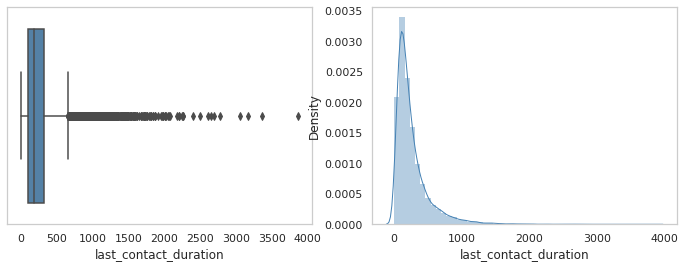

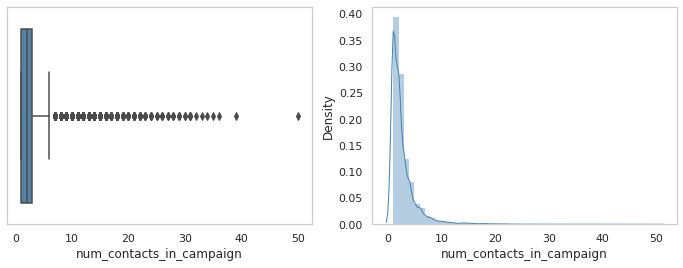

In [ ]:
fig_num = 1        
for col in test_df.select_dtypes(include=[np.number]).columns:
    if col in cont_feat:
        hist_box_plot(test_df,col, fig_num)
        fig_num = fig_num + 1

Filling balance with a low negative value manually as the missing % is 1.26 for train_df and 1.33 for test_df

In [ ]:
train_df["balance"].min()

-8020.0

In [ ]:
train_df["balance"]=train_df["balance"].fillna(-10000000)
test_df["balance"]=test_df["balance"].fillna(-10000000)

In [ ]:
train_df["balance"].min()

-10000000.0

As 'customer_age', 'num_contacts_in_campaign', 'last_contact_duration' are having outliers, median is taken

In [ ]:
married_train = train_df[train_df["marital"]=="married"]["customer_age"].median()
single_train = train_df[train_df["marital"]=="single"]["customer_age"].median()
divorced_train = train_df[train_df["marital"]=="divorced"]["customer_age"].median()
unknown_train = train_df[train_df["marital"]=="unknown"]["customer_age"].median()

single_test = test_df[test_df["marital"]=="single"]["customer_age"].median()
married_test = test_df[test_df["marital"]=="married"]["customer_age"].median()
divorced_test = test_df[test_df["marital"]=="divorced"]["customer_age"].median()
unknown_test = test_df[test_df["marital"]=="unknown"]["customer_age"].median()

In [ ]:
for i in range(len(train_df)):
    if np.isnan(train_df["customer_age"][i]):
        if train_df["marital"][i] == "single":
            train_df["customer_age"][i] = round(single_train)
        if train_df["marital"][i] == "married":
            train_df["customer_age"][i] = round(married_train)
        if train_df["marital"][i] == "divorced":
            train_df["customer_age"][i] = round(divorced_train)
        if train_df["marital"][i] == "unknown":
            train_df["customer_age"][i] = round(unknown_train)

for i in range(len(test_df)):
    if np.isnan(test_df["customer_age"][i]):
        if test_df["marital"][i] == "single":
            test_df["customer_age"][i] = round(single_test)
        if test_df["marital"][i] == "married":
            test_df["customer_age"][i] = round(married_test)
        if test_df["marital"][i] == "divorced":
            test_df["customer_age"][i] = round(divorced_test)
        if test_df["marital"][i] == "unknown":
            test_df["customer_age"][i] = round(unknown_test)

In [ ]:
for column in ['num_contacts_in_campaign', 'last_contact_duration']:
  train_df[column]=train_df[column].fillna(train_df[column].median())
  test_df[column]=test_df[column].fillna(test_df[column].median())

In [ ]:
print("Train :")
print(get_MissingValues(train_df))
print()
print("Test : ")
print(get_MissingValues(test_df))

Train :
No missingValues

Test : 
No missingValues


In [ ]:
print("Train Shape:")
print(test_df.shape)
print()
print("Test Shape: ")
print(test_df.shape)

Train Shape:
(13564, 15)

Test Shape: 
(13564, 15)


In [ ]:
train_df.dtypes.value_counts()

object     9
float64    4
int64      2
dtype: int64

In [ ]:
numerical_df = train_df.select_dtypes(include=['float64','int64'])
numerical_df.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
0,28.0,285.0,26,303.0,4.0,0
1,34.0,934.0,18,143.0,2.0,1
2,46.0,656.0,5,101.0,4.0,0
3,34.0,2.0,20,127.0,3.0,0
4,41.0,1352.0,13,49.0,2.0,0


In [ ]:
categorical_df=train_df.select_dtypes(include='object')
categorical_df.head()

,job_type,marital,education,default,housing_loan,personal_loan,communication_type,month,prev_campaign_outcome
0,management,single,tertiary,no,yes,no,unknown,jun,unknown
1,blue-collar,married,secondary,no,no,yes,cellular,nov,other
2,technician,married,secondary,no,no,no,cellular,feb,unknown
3,services,single,secondary,no,yes,no,unknown,may,unknown
4,blue-collar,married,primary,no,yes,no,cellular,may,unknown


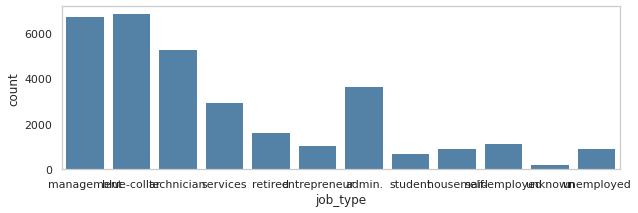

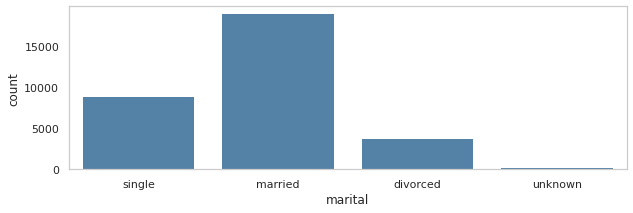

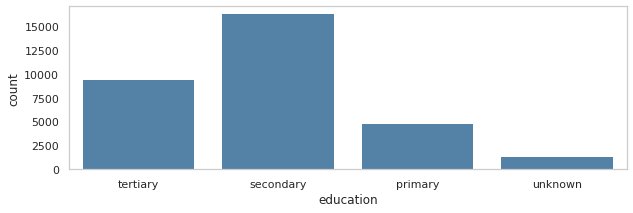

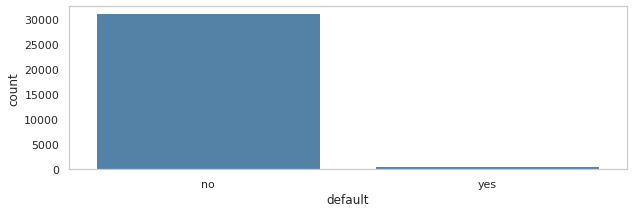

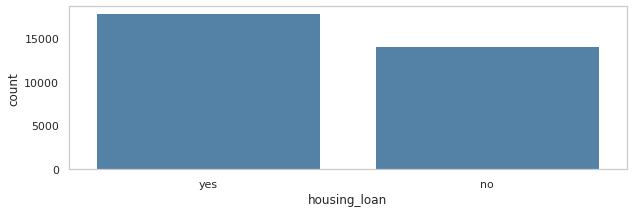

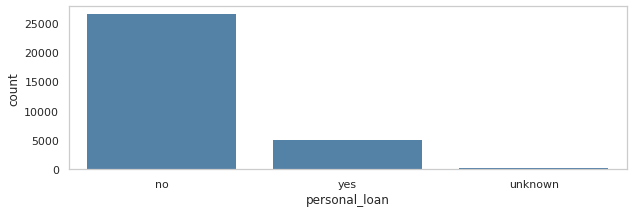

In [ ]:
for col in categorical_df.columns:
    if col in ['job_type','marital','education', 'default','housing_loan','personal_loan']:
        count_plot(train_df,col)

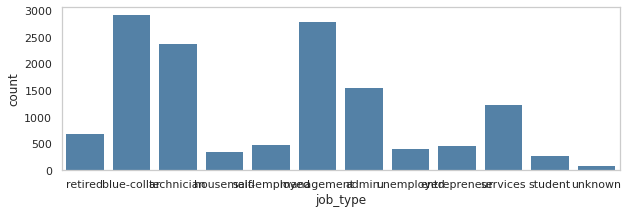

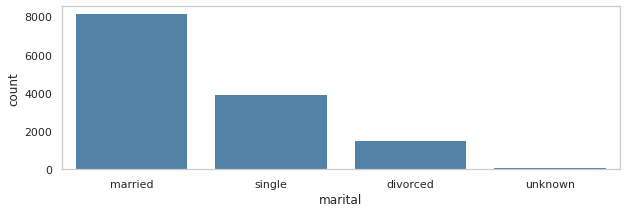

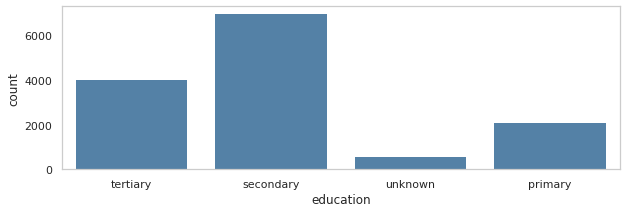

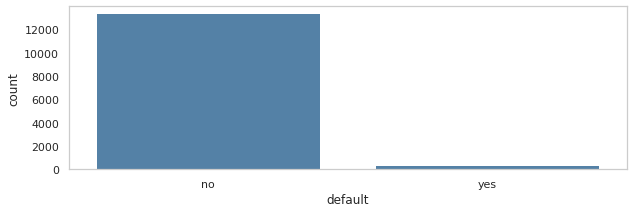

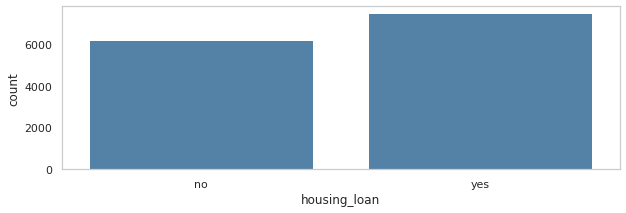

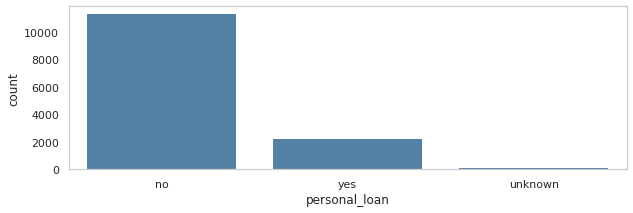

In [ ]:
for col in categorical_df.columns:
    if col in ['job_type','marital','education', 'default','housing_loan','personal_loan']:
        count_plot(test_df,col)

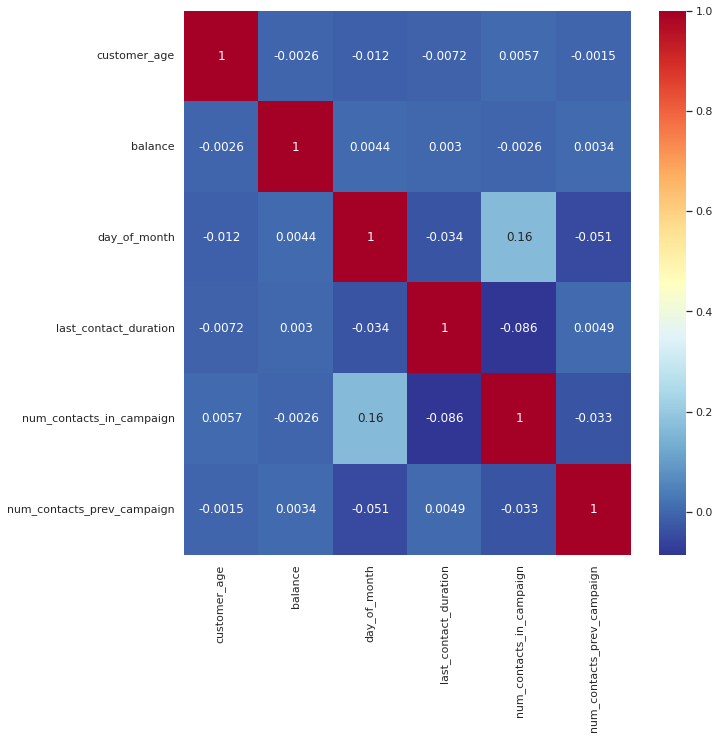

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(numerical_df.corr(), cmap='RdYlBu_r', annot=True);

### Outlier Treatment

In [ ]:
train_df.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99])

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,31647.000000,3.164700e+04,31647.000000,31647.000000,31647.000000,31647.000000
mean,40.420229,-1.247274e+05,15.818561,255.425538,2.773881,0.591620
std,10.668001,1.115920e+06,8.322970,255.033242,3.148046,2.499675
min,18.000000,-1.000000e+07,1.000000,0.000000,1.000000,0.000000
10%,28.000000,-5.000000e+00,5.000000,57.000000,1.000000,0.000000
25%,32.000000,6.100000e+01,8.000000,103.000000,1.000000,0.000000
50%,39.000000,4.340000e+02,16.000000,179.000000,2.000000,0.000000
75%,48.000000,1.394000e+03,21.000000,313.000000,3.000000,0.000000
85%,53.000000,2.498100e+03,27.000000,430.000000,4.000000,1.000000
90%,55.000000,3.546000e+03,28.000000,542.000000,5.000000,2.000000


In [ ]:
test_df.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99])

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,13564.000000,1.356400e+04,13564.000000,13564.000000,13564.000000,13564.000000
mean,40.436007,-1.321180e+05,15.778089,260.458935,2.728546,0.553966
std,10.659619,1.147635e+06,8.321562,260.125592,2.936755,1.762402
min,18.000000,-1.000000e+07,1.000000,0.000000,1.000000,0.000000
10%,28.000000,-5.000000e+00,5.000000,58.000000,1.000000,0.000000
25%,32.000000,6.000000e+01,8.000000,102.000000,1.000000,0.000000
50%,39.000000,4.340000e+02,16.000000,182.000000,2.000000,0.000000
75%,48.000000,1.435250e+03,21.000000,323.000000,3.000000,0.000000
85%,53.000000,2.515000e+03,27.000000,445.000000,4.000000,1.000000
90%,55.000000,3.535700e+03,28.000000,559.000000,5.000000,2.000000


In [ ]:
def outlier_capping_lowerUpperBound(df):
    numeric_features_columns = numerical_df.columns.to_list()

    for feature in numeric_features_columns:    
        q1 = df[feature].quantile(0.25)
        q3 = df[feature].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 -(1.5 * iqr)
        upper_bound = q3 +(1.5 * iqr)
        df[feature][df[feature] < lower_bound] = lower_bound
        df[feature][df[feature] > upper_bound] = upper_bound
    return df

In [ ]:
train_df = outlier_capping_lowerUpperBound(train_df)
    
train_df.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99])

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,31647.000000,31647.000000,31647.000000,31647.000000,31647.000000,31647.0
mean,40.371188,889.000632,15.818561,231.721901,2.392233,0.0
std,10.499923,1196.574287,8.322970,172.981036,1.600676,0.0
min,18.000000,-1938.500000,1.000000,0.000000,1.000000,0.0
10%,28.000000,-5.000000,5.000000,57.000000,1.000000,0.0
25%,32.000000,61.000000,8.000000,103.000000,1.000000,0.0
50%,39.000000,434.000000,16.000000,179.000000,2.000000,0.0
75%,48.000000,1394.000000,21.000000,313.000000,3.000000,0.0
85%,53.000000,2498.100000,27.000000,430.000000,4.000000,0.0
90%,55.000000,3393.500000,28.000000,542.000000,5.000000,0.0


In [ ]:
test_df = outlier_capping_lowerUpperBound(test_df)
    
test_df.describe(percentiles=[0.1, .25, .50, .75, .85, .90, .95, .98, .99])

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign,num_contacts_prev_campaign
count,13564.000000,13564.000000,13564.000000,13564.000000,13564.000000,13564.0
mean,40.386317,901.605214,15.778089,237.555183,2.387644,0.0
std,10.488790,1228.333524,8.321562,180.508709,1.590722,0.0
min,18.000000,-2002.875000,1.000000,0.000000,1.000000,0.0
10%,28.000000,-5.000000,5.000000,58.000000,1.000000,0.0
25%,32.000000,60.000000,8.000000,102.000000,1.000000,0.0
50%,39.000000,434.000000,16.000000,182.000000,2.000000,0.0
75%,48.000000,1435.250000,21.000000,323.000000,3.000000,0.0
85%,53.000000,2515.000000,27.000000,445.000000,4.000000,0.0
90%,55.000000,3498.125000,28.000000,559.000000,5.000000,0.0


**num_contacts_prev_campaign** the statistical value for this feature is zero. So dropping the from both train_df and test_df

In [ ]:
train_df.drop('num_contacts_prev_campaign',axis=1,inplace=True)
test_df.drop('num_contacts_prev_campaign',axis=1,inplace=True)

In [ ]:
numerical_df = train_df.select_dtypes(include=['float64','int64'])
numerical_df.head()

,customer_age,balance,day_of_month,last_contact_duration,num_contacts_in_campaign
0,28.0,285.0,26,303.0,4.0
1,34.0,934.0,18,143.0,2.0
2,46.0,656.0,5,101.0,4.0
3,34.0,2.0,20,127.0,3.0
4,41.0,1352.0,13,49.0,2.0


In [ ]:
train_clean_df = train_df.copy()
test_clean_df = test_df.copy()

print(train_clean_df.info())
print() 
print(test_clean_df.info())
print("\n"*2) 
print(train_clean_df.shape)
print() 
print(test_clean_df.shape)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31647 entries, 0 to 31646
Data columns (total 14 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_age              31647 non-null  float64
 1   job_type                  31647 non-null  object 
 2   marital                   31647 non-null  object 
 3   education                 31647 non-null  object 
 4   default                   31647 non-null  object 
 5   balance                   31647 non-null  float64
 6   housing_loan              31647 non-null  object 
 7   personal_loan             31647 non-null  object 
 8   communication_type        31647 non-null  object 
 9   day_of_month              31647 non-null  int64  
 10  month                     31647 non-null  object 
 11  last_contact_duration     31647 non-null  float64
 12  num_contacts_in_campaign  31647 non-null  float64
 13  prev_campaign_outcome     31647 non-null  object 
dtypes: flo

## Checking data for Clustering

In [ ]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# define standard scaler
scaler = StandardScaler()
# scaler = MinMaxScaler()

# transform data
train_df[numerical_df.columns] = scaler.fit_transform(train_df[numerical_df.columns])


# transform data
test_df[numerical_df.columns] = scaler.fit_transform(test_df[numerical_df.columns])

train_clean_scaled_df = train_df.copy()
test_clean_scaled_df = test_df.copy()

In [ ]:
train_df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,prev_campaign_outcome
0,-1.178236,management,single,tertiary,no,-0.504783,yes,no,unknown,1.223313,jun,0.412064,1.004446,unknown
1,-0.606794,blue-collar,married,secondary,no,0.037607,no,yes,cellular,0.262103,nov,-0.512908,-0.245046,other
2,0.536090,technician,married,secondary,no,-0.194726,no,no,cellular,-1.299864,feb,-0.755713,1.004446,unknown
3,-0.606794,services,single,secondary,no,-0.741295,yes,no,unknown,0.502405,may,-0.605405,0.379700,unknown
4,0.059888,blue-collar,married,primary,no,0.386944,yes,no,cellular,-0.338654,may,-1.056328,-0.245046,unknown


In [ ]:
test_df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,prev_campaign_outcome
0,1.393318,retired,married,tertiary,no,2.113934,no,no,cellular,-0.333855,aug,-0.817471,-0.243699,unknown
1,-1.562327,blue-collar,single,secondary,no,-0.588303,yes,no,cellular,0.267016,may,-0.967054,-0.243699,unknown
2,0.535228,technician,divorced,secondary,no,-0.617612,no,no,cellular,-0.934725,jul,-0.163739,-0.872368,unknown
3,1.488662,housemaid,single,unknown,no,2.113934,no,no,unknown,-1.175074,jun,-1.127717,-0.872368,unknown
4,2.060722,retired,married,secondary,no,1.637559,no,no,cellular,-0.454029,apr,-0.612487,-0.872368,success


### **Hopkins Statistics**
To understand if the dataset can be clustered, we used the Hopkins statistic, which tests the spatial randomness of the data and indicates the cluster tendency or how well the data can be clustered. It calculates the probability that a given data is generated by a uniform distribution (Alboukadel Kassambara, n.d.). The inference is as follows for a data of dimensions ‘d’:


If the value is around 0.5 or lesser, the data is uniformly distributed and hence it is unlikely to have statistically significant clusters.<br>
If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster and therefore likely to have statistically significant clusters.

In [ ]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [ ]:
#Checking whether data can be clustered
hopkins(train_df[numerical_df.columns])

0.7428165497065089

Result: This test is run (code: (MATEVZKUNAVER, 2017)) on all the numerical variables of the entire dataset and the test statistic we got is 0.75 which indicates that data has high tendency to cluster and therefore likely to have statistically significant clusters.

##Clustering

In [ ]:
! pip install umap-learn

In [ ]:
import umap.umap_ as umap
from sklearn.preprocessing import PowerTransformer

In [ ]:
#Preprocessing numerical
numerical = train_df.select_dtypes(exclude='object')

for c in numerical.columns:
    pt = PowerTransformer()
    numerical.loc[:, c] = pt.fit_transform(np.array(numerical[c]).reshape(-1, 1))
    
##preprocessing categorical
categorical = train_df.select_dtypes(include='object')
categorical = pd.get_dummies(categorical)

#Percentage of columns which are categorical is used as weight parameter in embeddings later
categorical_weight = len(train_df.select_dtypes(include='object').columns) / train_df.shape[1]

In [ ]:
fit1 = umap.UMAP(metric='braycurtis').fit(numerical)
fit2 = umap.UMAP(metric='jaccard').fit(categorical)

In [ ]:
intersection = umap.general_simplicial_set_intersection(fit1.graph_, fit2.graph_, weight=0.4) #  weight=categorical_weight)
intersection = umap.reset_local_connectivity(intersection)

In [ ]:
embedding = umap.simplicial_set_embedding(fit1._raw_data, intersection, fit1.n_components, 
                                                fit1._initial_alpha, fit1._a, fit1._b, 
                                                fit1.repulsion_strength, fit1.negative_sample_rate, 
                                                200, 'random', np.random, fit1.metric, 
                                                fit1._metric_kwds, False, False, False)

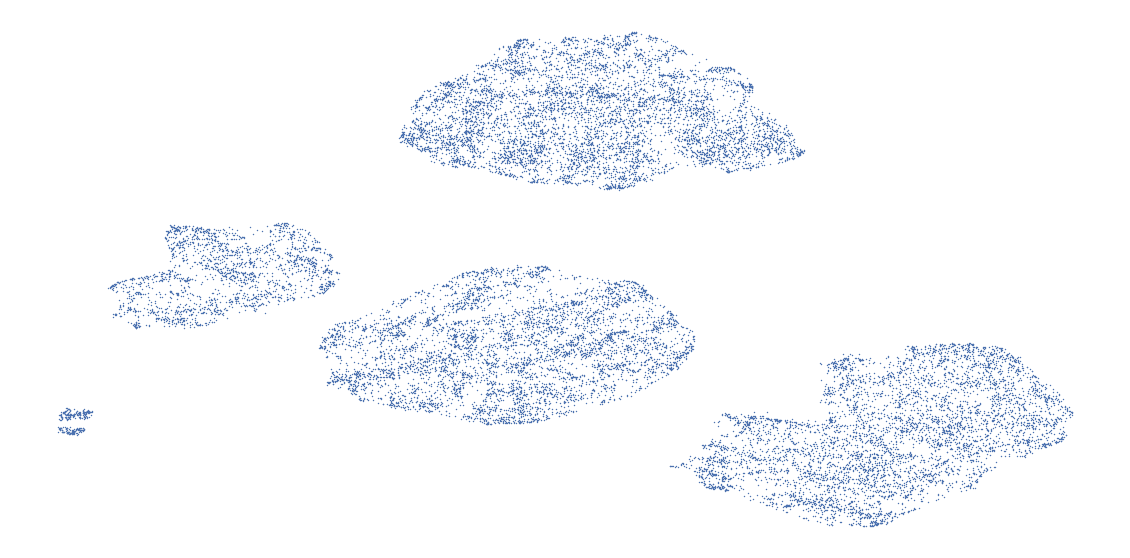

In [ ]:
plt.figure(figsize=(20, 10))
plt.scatter(embedding[0][:20000,0], embedding[0][:20000,1], s=2, cmap='Spectral', alpha=1.0)
plt.axis('off')
plt.show();

In [ ]:
data = pd.get_dummies(train_df)
for c in data.columns:
    pt = PowerTransformer()
    data.loc[:, c] = pt.fit_transform(np.array(data[c]).reshape(-1, 1))

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
from tqdm import tqdm

In [ ]:
import plotly.graph_objects as grpobj

In [ ]:
#Elbow method to choose the optimal number of clusters
sse = {}
for k in tqdm(range(2, 7)):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(data)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center


100%|██████████| 5/5 [00:10<00:00,  2.02s/it]


In [ ]:
fig = grpobj.Figure(data=grpobj.Scatter(x=list(sse.keys()), y=list(sse.values())))
fig.show()

In [ ]:
kmeans = KMeans(n_clusters=3).fit(data)
kmeans_labels = kmeans.labels_

In [ ]:
pd.Series(kmeans_labels).value_counts()

0    15257
2    10577
1     5813
dtype: int64

In [ ]:
train_df.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,prev_campaign_outcome
0,-1.178236,management,single,tertiary,no,-0.504783,yes,no,unknown,1.223313,jun,0.412064,1.004446,unknown
1,-0.606794,blue-collar,married,secondary,no,0.037607,no,yes,cellular,0.262103,nov,-0.512908,-0.245046,other
2,0.536090,technician,married,secondary,no,-0.194726,no,no,cellular,-1.299864,feb,-0.755713,1.004446,unknown
3,-0.606794,services,single,secondary,no,-0.741295,yes,no,unknown,0.502405,may,-0.605405,0.379700,unknown
4,0.059888,blue-collar,married,primary,no,0.386944,yes,no,cellular,-0.338654,may,-1.056328,-0.245046,unknown


**K-prototypes**<br>
For K-Prototypes, I'll apply the transformation to numerical data. Categorical data doesn't need any pre-processing.

In [ ]:
kprot_data = train_df.copy()
for c in train_df.select_dtypes(exclude='object').columns:
    pt = PowerTransformer()
    kprot_data[c] =  pt.fit_transform(np.array(kprot_data[c]).reshape(-1, 1))

In [ ]:
! pip install kmodes
from kmodes.kprototypes import KPrototypes

In [ ]:
# Get the position of categorical columns
catColumnsPos = [train_df.columns.get_loc(col) for col in list(train_df.select_dtypes('object').columns)]
print('Categorical columns           : {}'.format(list(train_df.select_dtypes('object').columns)))
print('Categorical columns position  : {}'.format(catColumnsPos))

Categorical columns           : ['job_type', 'marital', 'education', 'default', 'housing_loan', 'personal_loan', 'communication_type', 'month', 'prev_campaign_outcome']
Categorical columns position  : [1, 2, 3, 4, 6, 7, 8, 10, 13]


In [ ]:
costs = []
n_clusters = []
clusters_assigned = []

for i in tqdm(range(2, 7)):
    try:
        kproto = KPrototypes(n_jobs = -1, n_clusters = i, init = 'Huang', random_state = 41, verbose=2)
        clusters = kproto.fit_predict(kprot_data, categorical = catColumnsPos)
        costs.append(kproto.cost_)
        n_clusters.append(i)
        clusters_assigned.append(clusters)
    except:
        print(f"Can't cluster with {i} clusters")

  0%|          | 0/5 [00:00<?, ?it/s]

Best run was number 7


 20%|██        | 1/5 [07:35<30:21, 455.34s/it]

Best run was number 9


 40%|████      | 2/5 [17:30<26:52, 537.60s/it]

Best run was number 5


 60%|██████    | 3/5 [32:18<23:15, 697.54s/it]

Best run was number 4


 80%|████████  | 4/5 [50:40<14:17, 857.44s/it]

Best run was number 8


100%|██████████| 5/5 [1:14:19<00:00, 891.89s/it] 


In [ ]:
fig = grpobj.Figure(data=grpobj.Scatter(x=n_clusters, y=costs ))
fig.show()

In [ ]:
# Fit the cluster
kprototype = KPrototypes(n_jobs = -1, n_clusters = 3, init = 'Huang', random_state = 41)
kpclusters = kprototype.fit_predict(kprot_data, categorical = catColumnsPos)

In [ ]:
pd.Series(kpclusters).value_counts()

2    12205
1     9771
0     9671
dtype: int64

In [ ]:
proto_clusters = kprototype.labels_

In [ ]:
# Cluster centorid
kprototype.cluster_centroids_

array([['0.9058492713003385', '0.5641817121871046',
        '-0.23109716246178433', '0.18784208389725318',
        '-0.3439120452752658', 'management', 'married', 'secondary',
        'no', 'no', 'no', 'cellular', 'may', 'unknown'],
       ['-0.005333059126434406', '-0.21289150398860035',
        '0.5391210618681429', '-0.4859877604868652',
        '1.0407075647295398', 'management', 'married', 'secondary', 'no',
        'yes', 'no', 'cellular', 'may', 'unknown'],
       ['-0.7135074954544185', '-0.2766110981637793',
        '-0.24848924517374554', '0.2402265968330265',
        '-0.5606538488416948', 'blue-collar', 'married', 'secondary',
        'no', 'yes', 'no', 'cellular', 'may', 'unknown']], dtype='<U32')

In [ ]:
# Check the iteration of the clusters created
kprototype.n_iter_

43

In [ ]:
# Check the cost of the clusters created
kprototype.cost_

170964.22470256203

In [ ]:
kpr_orig_df = train_clean_df.reset_index()

In [ ]:
# Add the cluster to the dataframe
kpr_orig_df['Cluster Labels'] = kprototype.labels_
kpr_orig_df['Segment'] = kpr_orig_df['Cluster Labels'].map({0:'First', 1:'Second', 2:'Third'})

In [ ]:
# Order the cluster
kpr_orig_df['Segment'] = kpr_orig_df['Segment'].astype('category')
kpr_orig_df['Segment'] = kpr_orig_df['Segment'].cat.reorder_categories(['First','Second','Third'])

In [ ]:
# Cluster interpretation
kpr_orig_df.rename(columns = {'Cluster Labels':'Total'}, inplace = True)
kpr_orig_df.groupby('Segment').agg(
    {
        'customer_age':'median',
        'job_type': lambda x: x.value_counts().index[0],
        'marital': lambda x: x.value_counts().index[0],
        'education': lambda x: x.value_counts().index[0],
        'default': lambda x: x.value_counts().index[0],     
        'balance': 'mean',     
        'housing_loan': lambda x: x.value_counts().index[0],
        'personal_loan': lambda x: x.value_counts().index[0],
        'communication_type': lambda x: x.value_counts().index[0],
        'day_of_month': lambda x: x.value_counts().index[0],
        'default': lambda x: x.value_counts().index[0],
        'month': lambda x: x.value_counts().index[0],     
        'last_contact_duration': 'mean',
        'num_contacts_in_campaign': 'mean',
        'prev_campaign_outcome': lambda x: x.value_counts().index[0]
    }
).reset_index()

,Segment,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,prev_campaign_outcome
0,First,50.0,management,married,secondary,no,1593.212801,no,no,cellular,5,may,260.592700,1.793817,unknown
1,Second,39.0,management,married,secondary,no,625.923856,yes,no,cellular,20,may,157.343568,4.077577,unknown
2,Third,33.0,blue-collar,married,secondary,no,541.609177,yes,no,cellular,7,may,268.390578,1.517165,unknown


In [ ]:
from kmodes.kmodes import KModes

In [ ]:
cost = []
clusters = []
ind_clusters = []
for num_clusters in list(range(2,7)):
#     # kmode = KModes(n_clusters=num_clusters, init = "Cao", n_init = 1, verbose=1)
  try:  
    kmode = KModes(n_clusters=num_clusters, init = "Huang", n_init = 1, verbose=1, random_state = 41)
    kmode.fit_predict(train_df)
    cost.append(kmode.cost_)
    ind_clusters.append(num_clusters)
    clusters.append(kmode)
    print('Cluster initiation: {}'.format(num_clusters))
  except:
    print(f"Can't cluster with {num_clusters} clusters")
    break

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 10404, cost: 230336.0
Run 1, iteration: 2/100, moves: 5237, cost: 228228.0
Run 1, iteration: 3/100, moves: 386, cost: 228228.0
Cluster initiation: 2
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9972, cost: 222287.0
Run 1, iteration: 2/100, moves: 281, cost: 222287.0
Cluster initiation: 3
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9007, cost: 216896.0
Run 1, iteration: 2/100, moves: 1952, cost: 216896.0
Cluster initiation: 4
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 8716, cost: 210797.0
Run 1, iteration: 2/100, moves: 3276, cost: 210797.0
Cluster initiation: 5
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 1432

In [ ]:
# Converting the results into a dataframe and plotting them
df_cost = pd.DataFrame({'Cluster': range(2,7), 'Cost': cost})

In [ ]:
fig = grpobj.Figure(data=grpobj.Scatter(x=ind_clusters, y=cost ))
fig.show()

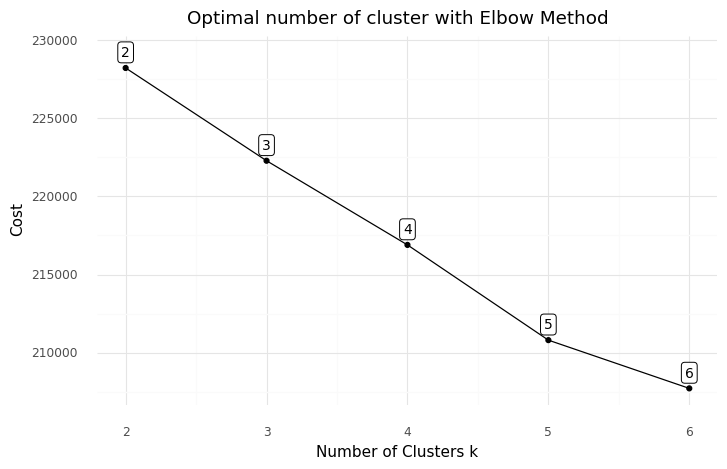

<ggplot: (8751693208669)>

In [ ]:
# Import module for data visualization
from plotnine import *
import plotnine
# Data viz
plotnine.options.figure_size = (8, 4.8)
(
    ggplot(data = df_cost)+
    geom_line(aes(x = 'Cluster',
                  y = 'Cost'))+
    geom_point(aes(x = 'Cluster',
                   y = 'Cost'))+
    geom_label(aes(x = 'Cluster',
                   y = 'Cost',
                   label = 'Cluster'),
               size = 10,
               nudge_y = 1000) +
    labs(title = 'Optimal number of cluster with Elbow Method')+
    xlab('Number of Clusters k')+
    ylab('Cost')+
    theme_minimal()
)

In [ ]:
km_cao = KModes(n_clusters=3, init = "Huang", n_init = 1, verbose=1, random_state = 41)
fitClusters_cao = km_cao.fit_predict(train_df)

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 9566, cost: 222943.0
Run 1, iteration: 2/100, moves: 1691, cost: 222771.0
Run 1, iteration: 3/100, moves: 176, cost: 222771.0


In [ ]:
kmode_clusters = km_cao.labels_

In [ ]:
orig_df = train_clean_df.reset_index()

In [ ]:
clustersDf = pd.DataFrame(fitClusters_cao)
clustersDf.columns = ['cluster_predicted']
combinedDf = pd.concat([orig_df, clustersDf], axis = 1).reset_index()
combinedDf = combinedDf.drop(['index', 'level_0'], axis = 1)

In [ ]:
combinedDf.head()

,customer_age,job_type,marital,education,default,balance,housing_loan,personal_loan,communication_type,day_of_month,month,last_contact_duration,num_contacts_in_campaign,prev_campaign_outcome,cluster_predicted
0,28.0,management,single,tertiary,no,285.0,yes,no,unknown,26,jun,303.0,4.0,unknown,1
1,34.0,blue-collar,married,secondary,no,934.0,no,yes,cellular,18,nov,143.0,2.0,other,0
2,46.0,technician,married,secondary,no,656.0,no,no,cellular,5,feb,101.0,4.0,unknown,0
3,34.0,services,single,secondary,no,2.0,yes,no,unknown,20,may,127.0,3.0,unknown,2
4,41.0,blue-collar,married,primary,no,1352.0,yes,no,cellular,13,may,49.0,2.0,unknown,2


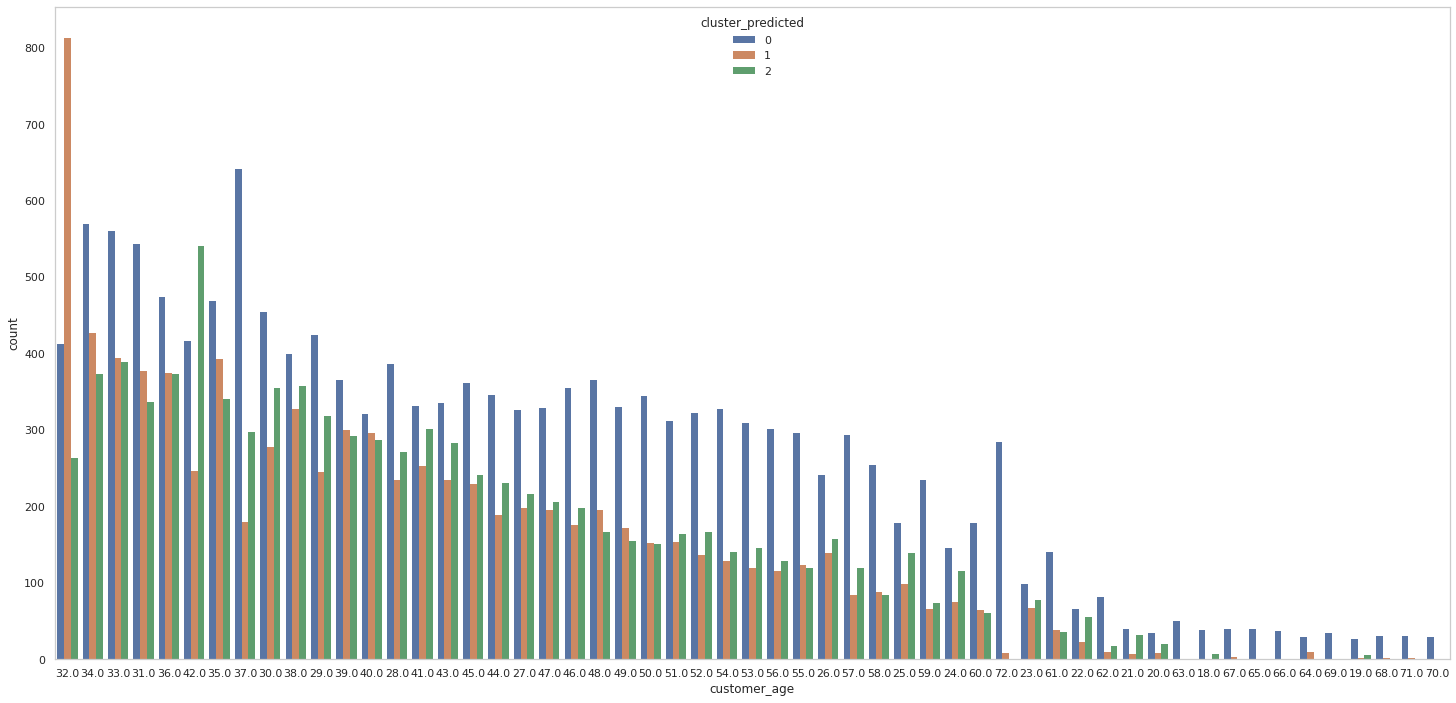

In [ ]:
plt.subplots(figsize = (25,12))
sns.countplot(x=combinedDf['customer_age'],order=combinedDf['customer_age'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

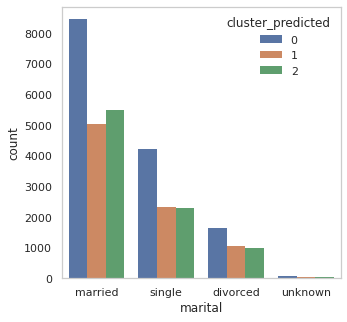

In [ ]:
plt.subplots(figsize = (5,5))
sns.countplot(x=combinedDf['marital'],order=combinedDf['marital'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

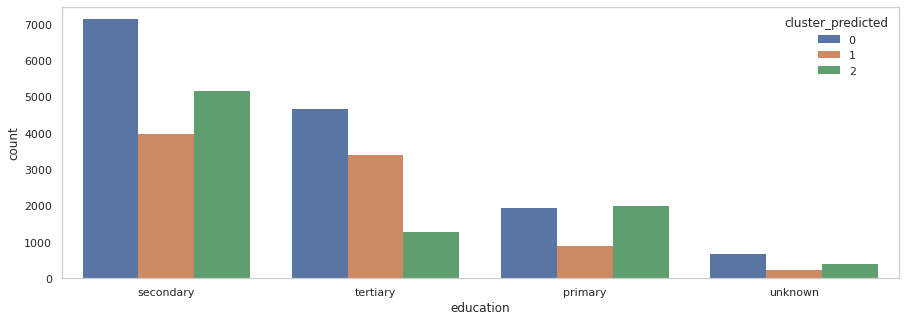

In [ ]:
plt.subplots(figsize = (15,5))
sns.countplot(x=combinedDf['education'],order=combinedDf['education'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

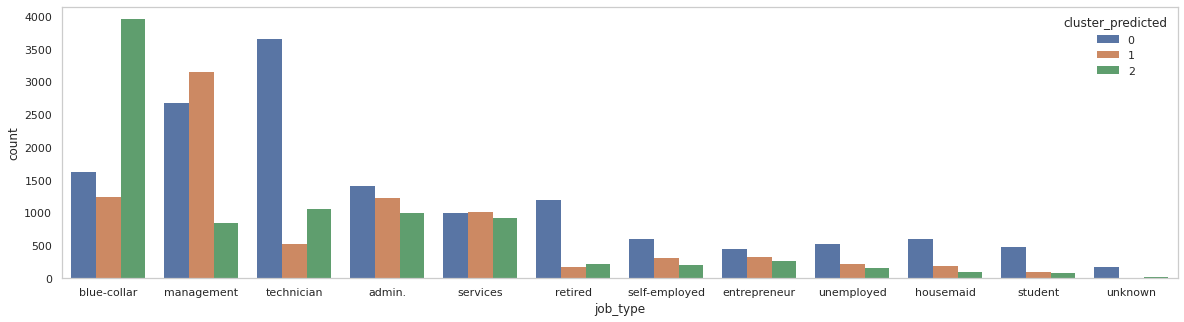

In [ ]:
plt.subplots(figsize = (20,5))
sns.countplot(x=combinedDf['job_type'],order=combinedDf['job_type'].value_counts().index,hue=combinedDf['cluster_predicted'])
plt.show()

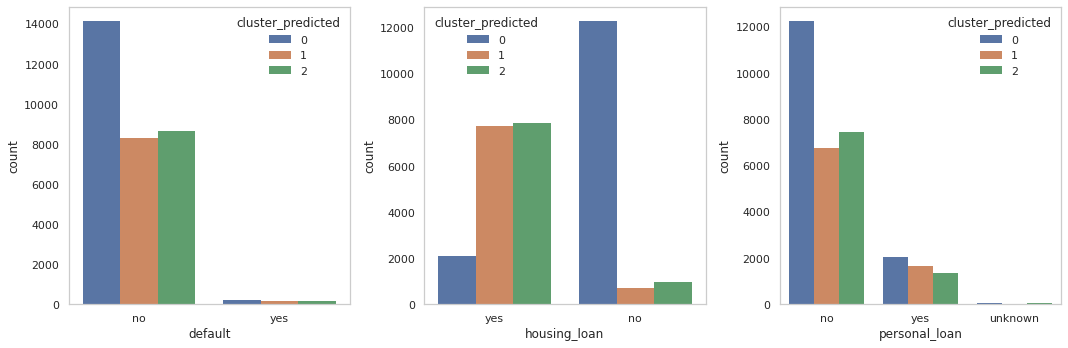

In [ ]:
f, axs = plt.subplots(1,3,figsize = (15,5))
sns.countplot(x=combinedDf['default'],order=combinedDf['default'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['housing_loan'],order=combinedDf['housing_loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])
sns.countplot(x=combinedDf['personal_loan'],order=combinedDf['personal_loan'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[2])

plt.tight_layout()
plt.show()

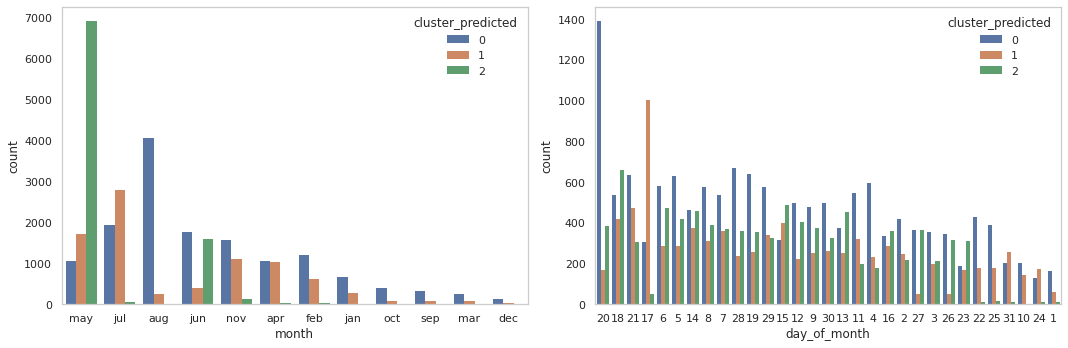

In [ ]:
f, axs = plt.subplots(1,2,figsize = (15,5))
sns.countplot(x=combinedDf['month'],order=combinedDf['month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[0])
sns.countplot(x=combinedDf['day_of_month'],order=combinedDf['day_of_month'].value_counts().index,hue=combinedDf['cluster_predicted'],ax=axs[1])

plt.tight_layout()
plt.show()

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

In [ ]:
!pip install shap
import shap

In [ ]:
#Setting the objects to category 
final_eval_df = train_df.copy()
for c in final_eval_df.select_dtypes(include='object'):
    final_eval_df[c] = final_eval_df[c].astype('category')

In [ ]:
#KMeans clusters
clf_km = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_km = cross_val_score(clf_km, final_eval_df, kmeans_labels, scoring='f1_weighted')
print(f'CV F1 score for K-Means clusters is {np.mean(cv_scores_km)}')

CV F1 score for K-Means clusters is 0.9976620712963953


In [ ]:
#Fit the model
clf_km.fit(final_eval_df, kmeans_labels)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

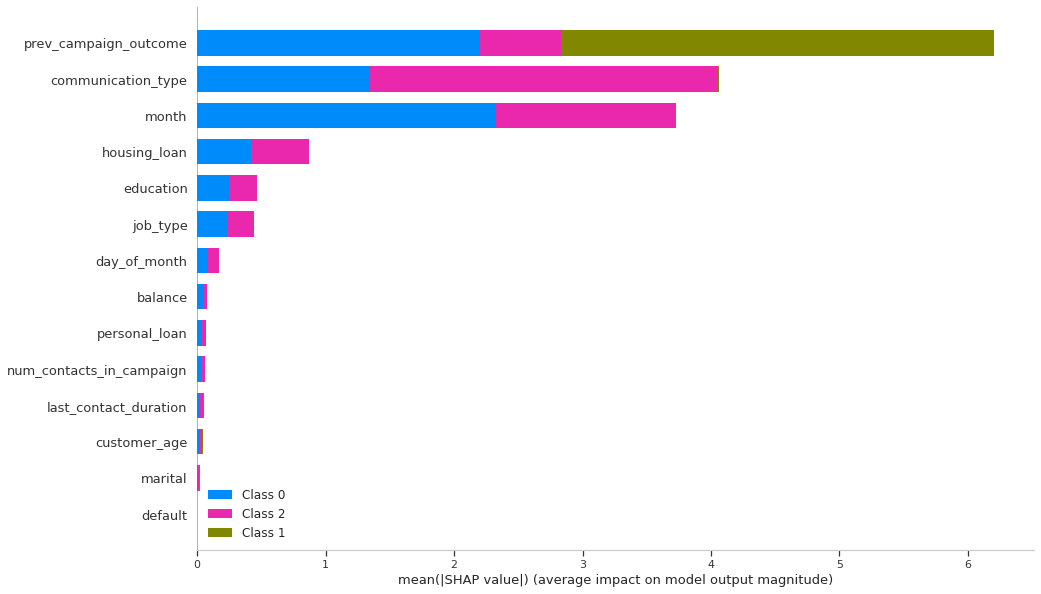

In [ ]:
#SHAP values
explainer_km = shap.TreeExplainer(clf_km)
shap_values_km = explainer_km.shap_values(final_eval_df)
shap.summary_plot(shap_values_km, final_eval_df, plot_type="bar", plot_size=(15, 10))

In [ ]:
#KPrototype clusters
clf_kp = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kp = cross_val_score(clf_kp, final_eval_df, proto_clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kp)}')

CV F1 score for K-Prototypes clusters is 0.9783527315648162


In [ ]:
clf_kp.fit(final_eval_df, proto_clusters)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

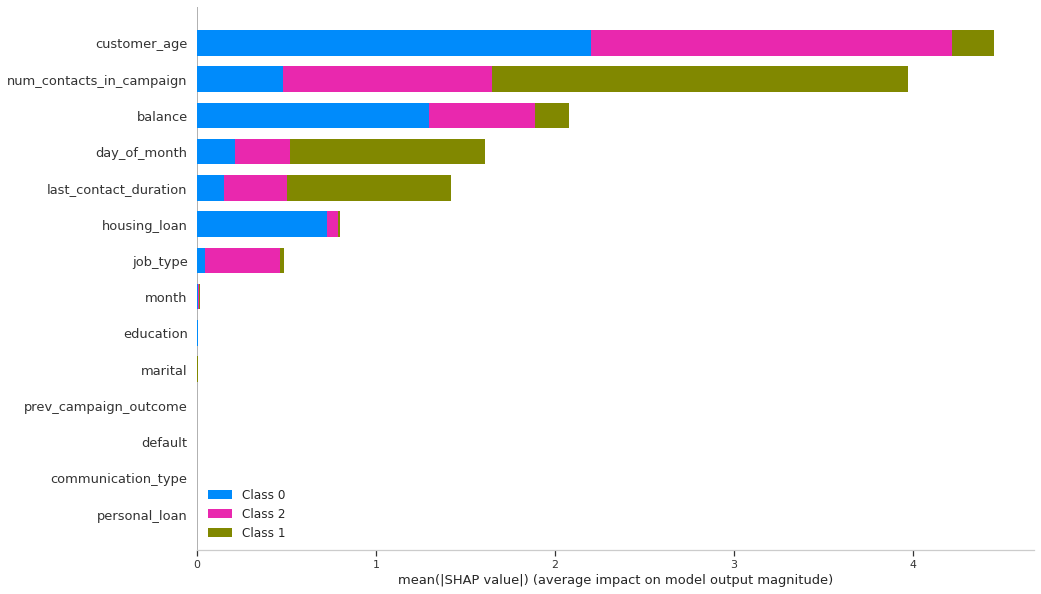

In [ ]:
#SHAP values
explainer_kp = shap.TreeExplainer(clf_kp)
shap_values_kp = explainer_kp.shap_values(final_eval_df)
shap.summary_plot(shap_values_kp, final_eval_df, plot_type="bar", plot_size=(15, 10))

In [ ]:
# KMode Clusters
clf_kmode = LGBMClassifier(colsample_by_tree=0.8)
cv_scores_kmode = cross_val_score(clf_kmode, final_eval_df, kmode_clusters, scoring='f1_weighted')
print(f'CV F1 score for K-Prototypes clusters is {np.mean(cv_scores_kmode)}')

CV F1 score for K-Prototypes clusters is 0.9961439831150963


In [ ]:
clf_kmode.fit(final_eval_df, kmode_clusters)

LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_by_tree=0.8,
               colsample_bytree=1.0, importance_type='split', learning_rate=0.1,
               max_depth=-1, min_child_samples=20, min_child_weight=0.001,
               min_split_gain=0.0, n_estimators=100, n_jobs=-1, num_leaves=31,
               objective=None, random_state=None, reg_alpha=0.0, reg_lambda=0.0,
               silent=True, subsample=1.0, subsample_for_bin=200000,
               subsample_freq=0)

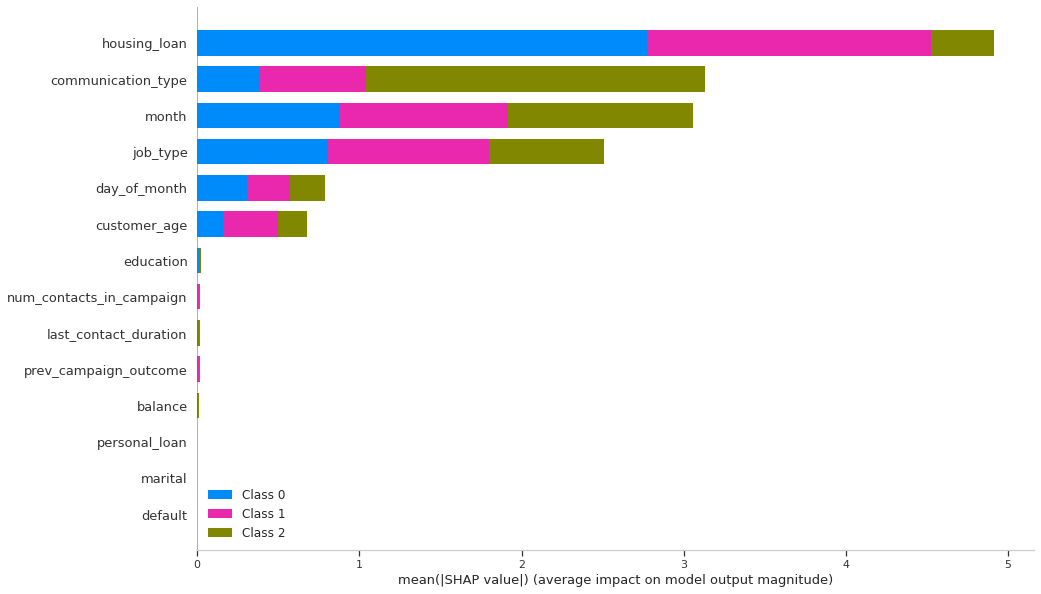

In [ ]:
#SHAP values
explainer_kmode = shap.TreeExplainer(clf_kmode)
shap_values_kmode = explainer_kmode.shap_values(final_eval_df)
shap.summary_plot(shap_values_kmode, final_eval_df, plot_type="bar", plot_size=(15, 10))

## Rule generation from decision tree

In [ ]:
train_clean_df = pd.get_dummies(train_clean_df)
for c in train_clean_df.columns:
    pt = PowerTransformer()
    train_clean_df.loc[:, c] = pt.fit_transform(np.array(train_clean_df[c]).reshape(-1, 1))

In [ ]:
from sklearn.tree import _tree, DecisionTreeClassifier
from IPython.display import display, HTML

In [ ]:
def pretty_print(df):
    return display( HTML( df.to_html().replace("\\n","<br>") ) )

def get_class_rules(tree: DecisionTreeClassifier, feature_names: list):
  inner_tree: _tree.Tree = tree.tree_
  classes = tree.classes_
  class_rules_dict = dict()

  def tree_dfs(node_id=0, current_rule=[]):
    # feature[i] holds the feature to split on, for the internal node i.
    split_feature = inner_tree.feature[node_id]
    if split_feature != _tree.TREE_UNDEFINED: # internal node
      name = feature_names[split_feature]
      threshold = inner_tree.threshold[node_id]
      # left child
      left_rule = current_rule + ["({} <= {})".format(name, threshold)]
      tree_dfs(inner_tree.children_left[node_id], left_rule)
      # right child
      right_rule = current_rule + ["({} > {})".format(name, threshold)]
      tree_dfs(inner_tree.children_right[node_id], right_rule)
    else: # leaf
      dist = inner_tree.value[node_id][0]
      dist = dist/dist.sum()
      max_idx = dist.argmax()
      if len(current_rule) == 0:
        rule_string = "ALL"
      else:
        rule_string = " and ".join(current_rule)
      # register new rule to dictionary
      selected_class = classes[max_idx]
      class_probability = dist[max_idx]
      class_rules = class_rules_dict.get(selected_class, [])
      class_rules.append((rule_string, class_probability))
      class_rules_dict[selected_class] = class_rules
    
  tree_dfs() # start from root, node_id = 0
  return class_rules_dict

def cluster_report(data: pd.DataFrame, clusters, min_samples_leaf=50, pruning_level=0.01):
    # Create Model
    tree = DecisionTreeClassifier(min_samples_leaf=min_samples_leaf, ccp_alpha=pruning_level)
    tree.fit(data, clusters)
    
    # Generate Report
    feature_names = data.columns
    class_rule_dict = get_class_rules(tree, feature_names)

    report_class_list = []
    for class_name in class_rule_dict.keys():
        rule_list = class_rule_dict[class_name]
        combined_string = ""
        for rule in rule_list:
            combined_string += "[{}] {}\n\n".format(rule[1], rule[0])
        report_class_list.append((class_name, combined_string))
        
    cluster_instance_df = pd.Series(clusters).value_counts().reset_index()
    cluster_instance_df.columns = ['class_name', 'instance_count']
    report_df = pd.DataFrame(report_class_list, columns=['class_name', 'rule_list'])
    report_df = pd.merge(cluster_instance_df, report_df, on='class_name', how='left')
    pretty_print(report_df.sort_values(by='class_name')[['class_name', 'instance_count', 'rule_list']])

In [ ]:
cluster_report(train_clean_df, kmeans_labels, min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
0,0,15257,[0.9981272109315391] (communication_type_unknown <= 0.46505215764045715) and (prev_campaign_outcome_unknown > -0.8167467564344406) and (month_may <= 0.4208976626396179)
2,1,5813,[1.0] (communication_type_unknown <= 0.46505215764045715) and (prev_campaign_outcome_unknown <= -0.8167467564344406)
1,2,10577,[0.6784788245462403] (communication_type_unknown <= 0.46505215764045715) and (prev_campaign_outcome_unknown > -0.8167467564344406) and (month_may > 0.4208976626396179)[0.9813135176483444] (communication_type_unknown > 0.46505215764045715)


In [ ]:
cluster_report(train_clean_df, proto_clusters, min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
2,0,9671,[0.7803056819507642] (num_contacts_in_campaign <= 0.4466759189963341) and (customer_age > 0.23481279611587524)
1,1,9771,[0.7383583640313592] (num_contacts_in_campaign > 0.4466759189963341)
0,2,12205,[0.8027864520778285] (num_contacts_in_campaign <= 0.4466759189963341) and (customer_age <= 0.23481279611587524)


In [ ]:
cluster_report(train_clean_df, kmode_clusters, min_samples_leaf=20, pruning_level=0.05)

,class_name,instance_count,rule_list
0,0,14383,[0.8819100881910088] (housing_loan_yes <= -0.11943221092224121)
2,1,8453,[0.6678684091933303] (housing_loan_yes > -0.11943221092224121) and (communication_type_unknown <= 0.46505215764045715)
1,2,8811,[0.9432248296744891] (housing_loan_yes > -0.11943221092224121) and (communication_type_unknown > 0.46505215764045715)
